## Guia da Camada Física
O documento tem o objetivo de demostrar o funcionamento da camda física,além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

Será instaciada a rede e definida a topologia de Grade

2024-06-05 11:21:30,386: Qubit 0 adicionado à memória do Host 0.
2024-06-05 11:21:30,391: Qubit 0 criado com fidelidade inicial 0.7485251145059293 e adicionado à memória do Host 0.
2024-06-05 11:21:30,395: Qubit 1 adicionado à memória do Host 1.
2024-06-05 11:21:30,400: Qubit 1 criado com fidelidade inicial 0.7485251145059293 e adicionado à memória do Host 1.
2024-06-05 11:21:30,403: Qubit 2 adicionado à memória do Host 2.
2024-06-05 11:21:30,405: Qubit 2 criado com fidelidade inicial 0.7485251145059293 e adicionado à memória do Host 2.
2024-06-05 11:21:30,407: Qubit 3 adicionado à memória do Host 3.
2024-06-05 11:21:30,408: Qubit 3 criado com fidelidade inicial 0.7485251145059293 e adicionado à memória do Host 3.
2024-06-05 11:21:30,410: Qubit 4 adicionado à memória do Host 4.
2024-06-05 11:21:30,412: Qubit 4 criado com fidelidade inicial 0.7485251145059293 e adicionado à memória do Host 4.
2024-06-05 11:21:30,416: Qubit 5 adicionado à memória do Host 5.
2024-06-05 11:21:30,419: Qubit

Hosts inicializados
Canais inicializados


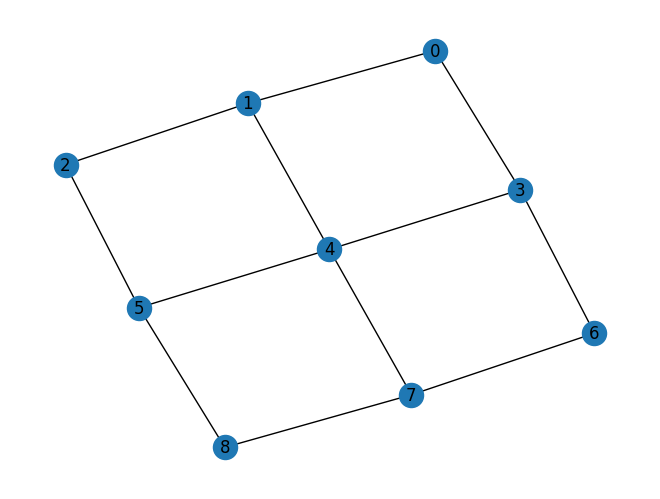

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
#Esse código basicamente seleciona aleatoriamente uma aresta do grafo da rede e imprime tanto todas as arestas quanto a aresta selecionada aleatoriamente.
arestas = list(rede.edges)
print(arestas)
aresta_aleatorias = random.sample(arestas, 1)[0]
print(aresta_aleatorias)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 7), (7, 8)]
(1, 4)


In [4]:

#Deseguinando quem será Alice e Bob
x,y = aresta_aleatorias
alice = rede.get_host(x)
bob = rede.get_host(y)

h1 = Qubit(1)
h2 = Qubit(2)

#Adcionando qubits aos hosts
alice.add_qubit(h1)
bob.add_qubit(h2)



2024-06-05 11:21:32,101: Qubit 1 adicionado à memória do Host 1.
2024-06-05 11:21:32,109: Qubit 2 adicionado à memória do Host 4.


In [5]:
#É possível acessar a memória dos dois hosts
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x75f404627880>, <quantumnet.objects.qubit.Qubit object at 0x75f3d1afcb20>]
[<quantumnet.objects.qubit.Qubit object at 0x75f404627be0>, <quantumnet.objects.qubit.Qubit object at 0x75f3d1afd030>]


In [6]:
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x75f404627880>, <quantumnet.objects.qubit.Qubit object at 0x75f3d1afcb20>]
[<quantumnet.objects.qubit.Qubit object at 0x75f404627be0>, <quantumnet.objects.qubit.Qubit object at 0x75f3d1afd030>]


In [7]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

Qubit 1 with state None


In [8]:
#Aqui é criando o par EPR e retorna a fidelidade de Alice e Bob
rede.physical.create_epr_pair(h1,h2)

2024-06-05 11:21:32,636: A fidelidade do qubit Qubit 1 with state None é 0.41541421063665696
2024-06-05 11:21:32,640: A fidelidade do qubit Qubit 2 with state None é 0.41541421063665696


In [9]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-06-05 11:21:32,763: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.17256896639887678


0.17256896639887678

In [10]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-06-05 11:21:32,911: A fidelidade do qubit Qubit 1 with state None é 0.41541421063665696


0.41541421063665696

### É possível a criação de ECHP entre dois qubits de Alice e Bob

In [11]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-06-05 11:21:33,147: A fidelidade do qubit Qubit 1 with state None é 0.7485251145059293
2024-06-05 11:21:33,156: A fidelidade do qubit Qubit 2 with state None é 0.41541421063665696
2024-06-05 11:21:33,162: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.31094796958419385
2024-06-05 11:21:33,167: O protocolo de criação de emaranhamento falhou.


False

In [12]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

Exception: Não há mais qubits na memória.

In [ ]:
#Obtem-se o útimo qubit da memória de Bob
qub2 = bob.get_last_qubit()
print(qub2)

### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP.

In [ ]:
rede.physical.echp_on_demand(2,5)

### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP.

In [ ]:
rede.physical.echp_on_replay(2,5)

In [ ]:
#Pode-se acessar o canal que mostrar as pprobablidades e os pares eprs.
rede.edges[2,5]

In [ ]:
#Além de poder acessar o dicionario que contém os pares eprs alocados.
rede.get_eprs()